In [124]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [100]:
train_data = pd.read_csv("galaxies_train.csv").to_numpy()
test_data = pd.read_csv("galaxies_test.csv").to_numpy()
X_train = train_data[:, 1:]
y_train = train_data[:,0]
X_test = test_data[:, 1:]
y_test = test_data[:,0]

In [97]:
max_depth = range(1,6)
best_depth = None
best_score = float("inf")

In [120]:
for depth in max_depth:
    regressor = DecisionTreeRegressor(max_depth=depth, random_state=12)
    scores = cross_val_score(regressor, X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_error')
    mean_score = -np.mean(scores)

    if mean_score < best_score:
        best_depth = depth
        best_score = mean_score
        
print("Best depth:", best_depth)
print("Best score:", best_score)

Best depth: 2
Best score: 0.7156340200890299


In [112]:
best_model = DecisionTreeRegressor(max_depth=2, random_state=12)
best_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=12)

In [113]:
predictions = best_model.predict(X_test)
error = mean_squared_error(y_test, predictions)
error

0.7716615488393982

<function matplotlib.pyplot.show(close=None, block=None)>

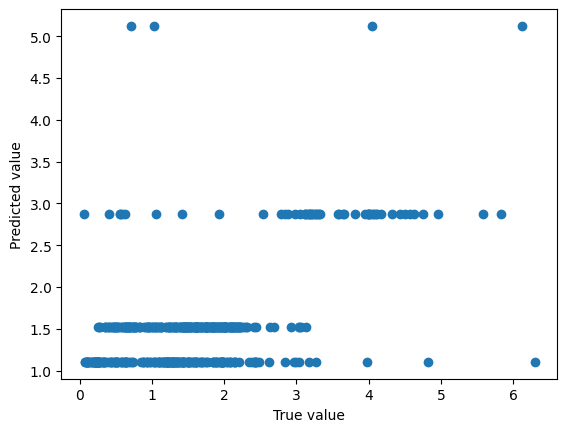

In [117]:
plt.scatter(y_test, predictions)
plt.xlabel("True value")
plt.ylabel("Predicted value")
plt.show

In [125]:
extra_tree_model = ExtraTreesRegressor(n_estimators=500, random_state=12)
extra_tree_model.fit(X_train, y_train)
extra_predictions = extra_tree_model.predict(X_test)
extr_error = mean_squared_error(y_test, extra_predictions)
extr_error

0.6087582108007814

<function matplotlib.pyplot.show(close=None, block=None)>

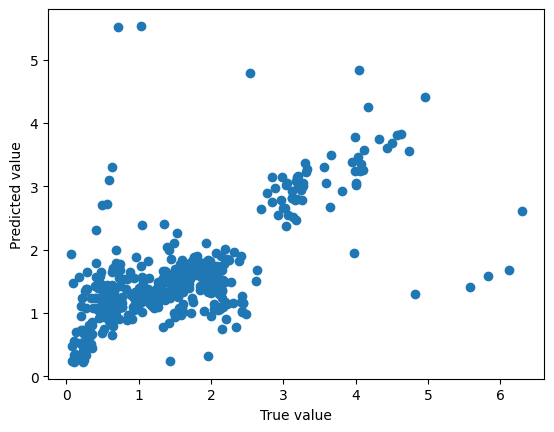

In [126]:
plt.scatter(y_test, extra_predictions)
plt.xlabel("True value")
plt.ylabel("Predicted value")
plt.show

No lines because we do not only use one decision tree?